<h3><strong>지도학습(회귀) 회귀트리</strong></h3>

In [1]:
import numpy as np
from pandas import DataFrame, read_excel, merge
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree,export_text

trainset tree score:  0.7964976841577938
testset tree score:  0.7378411496949093
|--- feature_7 <= 0.05
|   |--- feature_22 <= 101.15
|   |   |--- feature_7 <= 0.03
|   |   |   |--- value: [1.00]
|   |   |--- feature_7 >  0.03
|   |   |   |--- value: [0.95]
|   |--- feature_22 >  101.15
|   |   |--- value: [0.74]
|--- feature_7 >  0.05
|   |--- feature_22 <= 114.45
|   |   |--- value: [0.42]
|   |--- feature_22 >  114.45
|   |   |--- value: [0.00]



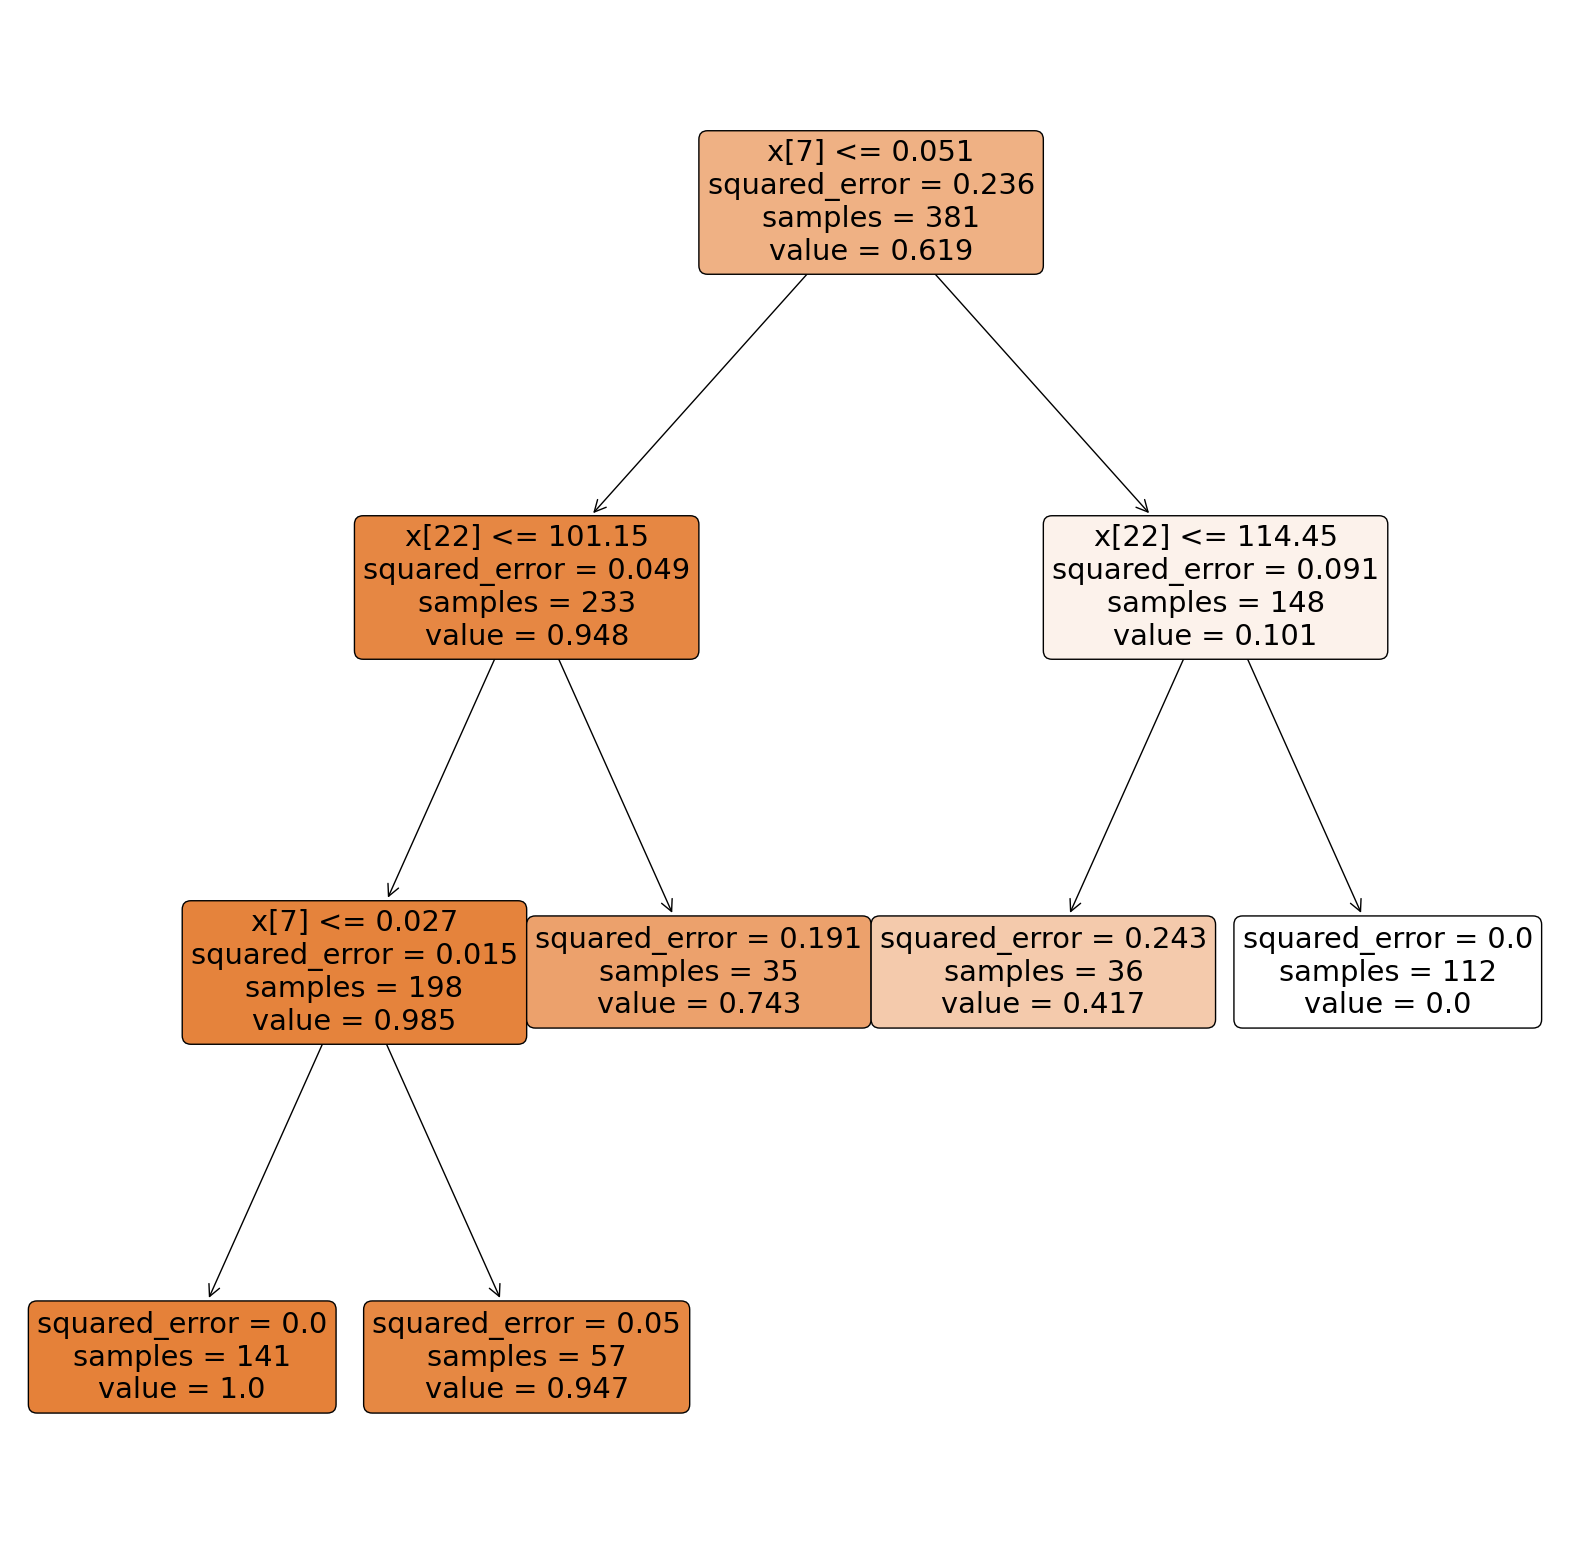

In [2]:
#MSE 기준 (default)
dataset=load_breast_cancer()
x=DataFrame(dataset['data'],columns=dataset['feature_names'])
y=DataFrame(dataset['target'],columns=['target'])

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.33,random_state=42)

reg_tree=DecisionTreeRegressor(random_state=1,min_samples_leaf=35,max_depth=10)
reg_tree.fit(x_train,y_train)   # 모델의 가중치 업데이트

# 모델의 결정계수로, 모델의 설명력을 의미함(높을수록 유의미함)
print("trainset tree score: ",reg_tree.score(x_train,y_train,sample_weight=None))
print("testset tree score: ",reg_tree.score(x_test, y_test, sample_weight=None))

print(export_text(reg_tree))

# 결정트리 그리기
plt.rcParams["figure.figsize"]=(20,20)
plt.rcParams['axes.unicode_minus']=False
plt.figure()

plot_tree(reg_tree, impurity=True, filled=True, rounded=True)

plt.show()

trainset tree score:  0.6993863237872588
testset tree score:  0.51301344517084
|--- feature_7 <= 0.05
|   |--- feature_19 <= 0.00
|   |   |--- feature_20 <= 13.81
|   |   |   |--- value: [1.00]
|   |   |--- feature_20 >  13.81
|   |   |   |--- feature_24 <= 0.12
|   |   |   |   |--- value: [1.00]
|   |   |   |--- feature_24 >  0.12
|   |   |   |   |--- value: [1.00]
|   |--- feature_19 >  0.00
|   |   |--- feature_20 <= 12.78
|   |   |   |--- value: [1.00]
|   |   |--- feature_20 >  12.78
|   |   |   |--- value: [1.00]
|--- feature_7 >  0.05
|   |--- feature_19 <= 0.00
|   |   |--- feature_7 <= 0.08
|   |   |   |--- value: [0.00]
|   |   |--- feature_7 >  0.08
|   |   |   |--- value: [0.00]
|   |--- feature_19 >  0.00
|   |   |--- feature_16 <= 0.05
|   |   |   |--- value: [0.00]
|   |   |--- feature_16 >  0.05
|   |   |   |--- value: [0.00]



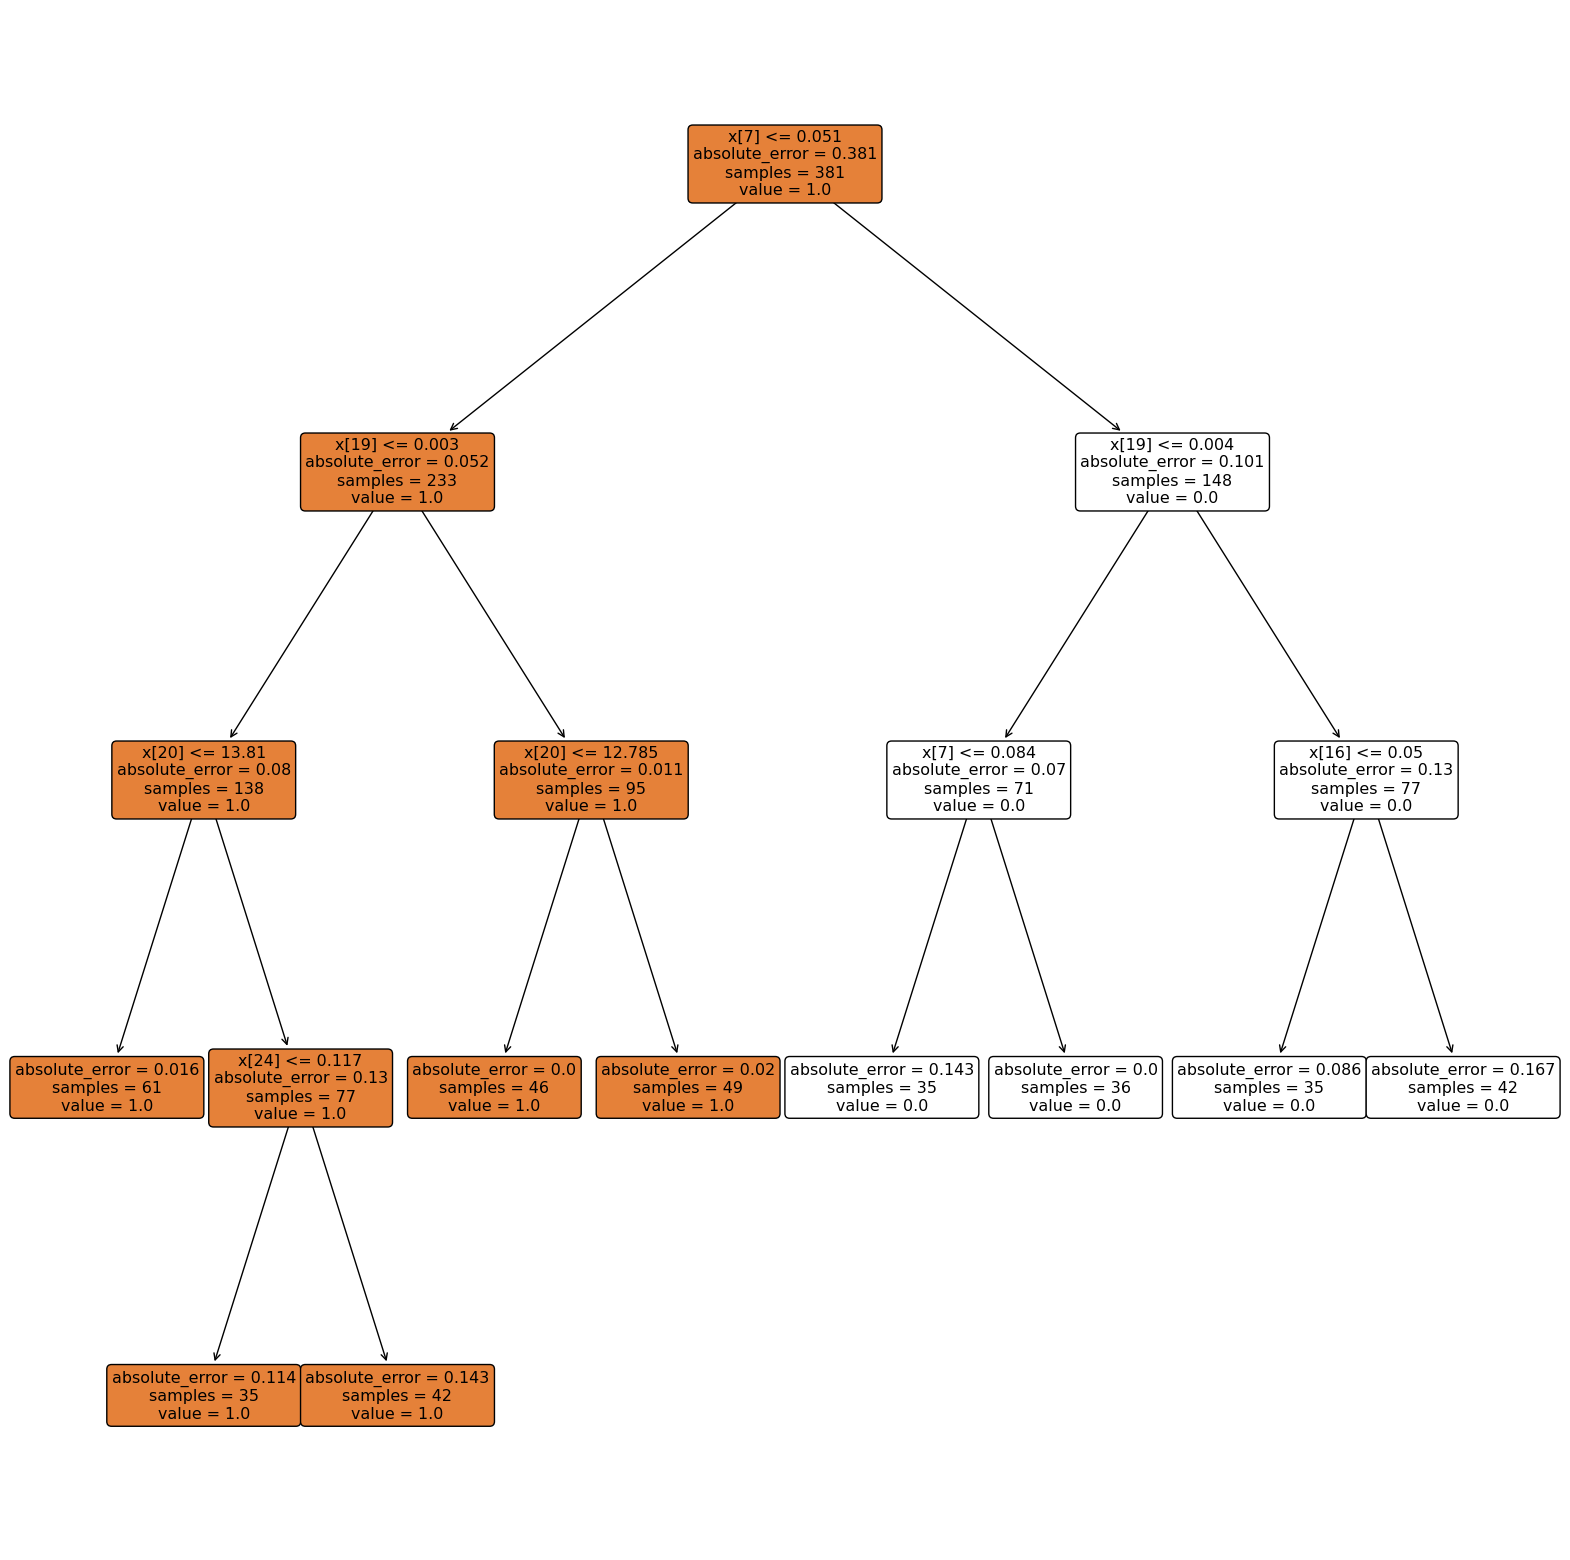

In [4]:
#MAE 기준
reg_tree=DecisionTreeRegressor(criterion='absolute_error',random_state=1,min_samples_leaf=35,max_depth=10)
reg_tree.fit(x_train,y_train)

print("trainset tree score: ",reg_tree.score(x_train,y_train,sample_weight=None))
print("testset tree score: ",reg_tree.score(x_test, y_test, sample_weight=None))

print(export_text(reg_tree))

plt.rcParams["figure.figsize"]=(20,20)
plt.rcParams['axes.unicode_minus']=False
plt.figure()

plot_tree(reg_tree, impurity=True, filled=True, rounded=True)

plt.show()

<h3>DecisionTreeRegressor() 함수의 파라미터 목록</h3>

criterion: 불순도 척도. 'squared_error', 'friedman_mse', 'absolute_error', 'poisson', default='squared_error'

- 'squared_error': 평균 제곱 오차(MSE), 변수선택 기준으로서의 분산 감소와 동일하다. 각 끝 노드의 평균을 사용한 L2 loss를 최소화한다.

- 'friedman_mse' : 잠재적 분할을 위한 Friedman의 improvement score를 포함하는 MSE.

- 'absolute_error': 오차의 절대값의 평균, 각 끝 노드의 중앙값을 사용한 L1 loss를 최소화 한다.

- 'poisson': 분기를 찾기 위해 포아송 편차 감소를 사용한다.

splitter: 각 노드의 분할 전략. 최적분할과 최적 랜덤분할. 'best', 'random', default='best'

max_depth: 트리 깊이의 최대값. 값을 입력하지 않을 경우, 모든 leaf가 pure해질때까지 혹은, 분기된 노드 속 샘플수가 설정한 최소 샘플수(min_samples_split)보다 적게 될때까지 분기한다. 'int값 입력'

min_samples_split: 분기 할 node 내 샘플의 최소 개수. 최소 개수보다 node 내 샘플 수가 적으면 leaf가 pure하지 않더라도 분기를 멈춘다. float 입력 시, 전체 샘플 개수 대비 float 비율만큼의 개수로 최소 샘플수가 설정된다. 'int 혹은 float값 입력', default=2

min_samples_leaf: leaf 노드에 있어야 하는 최소 샘플 수. 왼쪽 혹은 오른쪽 branch에 각각 min_samples_leaf만큼 훈련 샘플이 있어야 분기가 된다. 'int 혹은 float값 입력', default=2

min_weight_fraction_leaf: 모든 샘플의 가중치의 합계의 최소 가중치의 비율, 입력되지 않으면 모든 샘플의 가중치는 동일하다. 'float 입력', default=0.0

max_features: 최적의 분할을 찾기 위해 고려하는 feature의 개수. 'int or flaot값', 'auto', 'sqrt', 'log2', default=None.

random_state: 추정기의 무작위성 제어. 'int 입력', default=None

max_leaf_nodes: 최대 노드 수. default=None

min_impurity_decrease: 최소 불순도 감소값 이하인 경우에는 분기가 일어나지 않는다. 'float', default=0.0

ccp_alpha: 최소 비용-복잡성 가지치기에 사용되는 복잡도 매개변수. ccp_alpha보다 작은 비용-복잡도를 가진 하위 트리 중에 비용-복잡도가 가장 큰 하위 트리가 선택된다.